<a href="https://colab.research.google.com/github/mudheerakariyawasam/image_processing_epigraphs/blob/feature-fourier-transformation/Fourier_Intensity_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O miniconda.sh
!bash miniconda.sh -b -p /usr/local/miniconda
!/usr/local/miniconda/bin/conda init bash
!source ~/.bashrc

--2024-11-22 05:04:19--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 148337011 (141M) [application/octet-stream]
Saving to: ‘miniconda.sh’

miniconda.sh        100%[===================>] 141.46M   219MB/s    in 0.6s    

2024-11-22 05:04:20 (219 MB/s) - ‘miniconda.sh’ saved [148337011/148337011]

PREFIX=/usr/local/miniconda
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.
    You currently have a PYTHONPATH environment variable set. This may cause
    unexpected behavior when running the Python interpreter in Miniconda3.
    For best results, please verify that your PYTHONPATH only points to
    directorie

In [2]:
!apt-get install -y exiftool

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'libimage-exiftool-perl' instead of 'exiftool'
The following additional packages will be installed:
  libarchive-zip-perl libmime-charset-perl libsombok3 libunicode-linebreak-perl
Suggested packages:
  libposix-strptime-perl libencode-hanextra-perl libpod2-base-perl
The following NEW packages will be installed:
  libarchive-zip-perl libimage-exiftool-perl libmime-charset-perl libsombok3
  libunicode-linebreak-perl
0 upgraded, 5 newly installed, 0 to remove and 49 not upgraded.
Need to get 3,964 kB of archives.
After this operation, 23.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libarchive-zip-perl all 1.68-1 [90.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libimage-exiftool-perl all 12.40+dfsg-1 [3,717 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libmime-charset-perl all 1.012.2-1

In [3]:
!git clone https://github.com/micasense/imageprocessing
!cd imageprocessing
!conda env create -f micasense_conda_env.yml

Cloning into 'imageprocessing'...
remote: Enumerating objects: 1207, done.
remote: Counting objects: 100% (476/476), done.
remote: Compressing objects: 100% (60/60), done.
remote: Total 1207 (delta 437), reused 416 (delta 416), pack-reused 731 (from 1)
Receiving objects: 100% (1207/1207), 151.27 MiB | 22.30 MiB/s, done.
Resolving deltas: 100% (675/675), done.
Filtering content: 100% (68/68), 250.17 MiB | 18.49 MiB/s, done.
/bin/bash: line 1: conda: command not found


In [4]:
import sys
sys.path.append('/usr/local/miniconda/envs/micasense/bin')

In [5]:
!pip install pyexiftool
!pip install pyzbar
!pip install mapboxgl

!apt-get install libzbar0

import cv2 #openCV
import exiftool as et # Import the exiftool module
import os, glob
import numpy as np
import pyzbar.pyzbar as pyzbar
import matplotlib.pyplot as plt
import mapboxgl

print()
print("Successfully imported all required libraries.")
print()

if os.name == 'nt':
    if os.environ.get('exiftoolpath') is None:
        print("Set the exiftoolpath environment variable as described above")
    else:
        if not os.path.isfile(os.environ.get('exiftoolpath')):
            print("The provided exiftoolpath isn't a file, check the settings")

try:
    with et.ExifTool() as exift: # Use the et alias to interact with ExifTool
        print('Successfully executed exiftool.')
except Exception as e:
    print("Exiftool isn't working. Double check that you've followed the instructions above.")
    print("The execption text below may help to find the source of the problem:")
    print()
    print(e)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 1.8 MB/s eta 0:00:00
  Created wheel for chroma-py: filename=chroma_py-0.1.0.dev1-py3-none-any.whl size=5092 sha256=9212bb747446bd16d52b1a35f42d7a5cf6d8a28f8af087c77b3260ad17e917bc
  Stored in directory: /root/.cache/pip/wheels/45/89/c1/b8b2a40648c05fe0c0618b1de25aecde35c972e19cd4cb2341
Successfully built chroma-py
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 popp

In [6]:
from google.colab import drive
drive.mount('/content/drive')

# Add this to check for existing paths
sys.path.append('/usr/local/miniconda/envs/micasense/bin')

# Image path
imagePath = r"/content/drive/My Drive/UCSC/5. 4th Year/Research - Epigraphs/Data/Processed Images/"

Mounted at /content/drive


**ACC Images - Intensity 1**

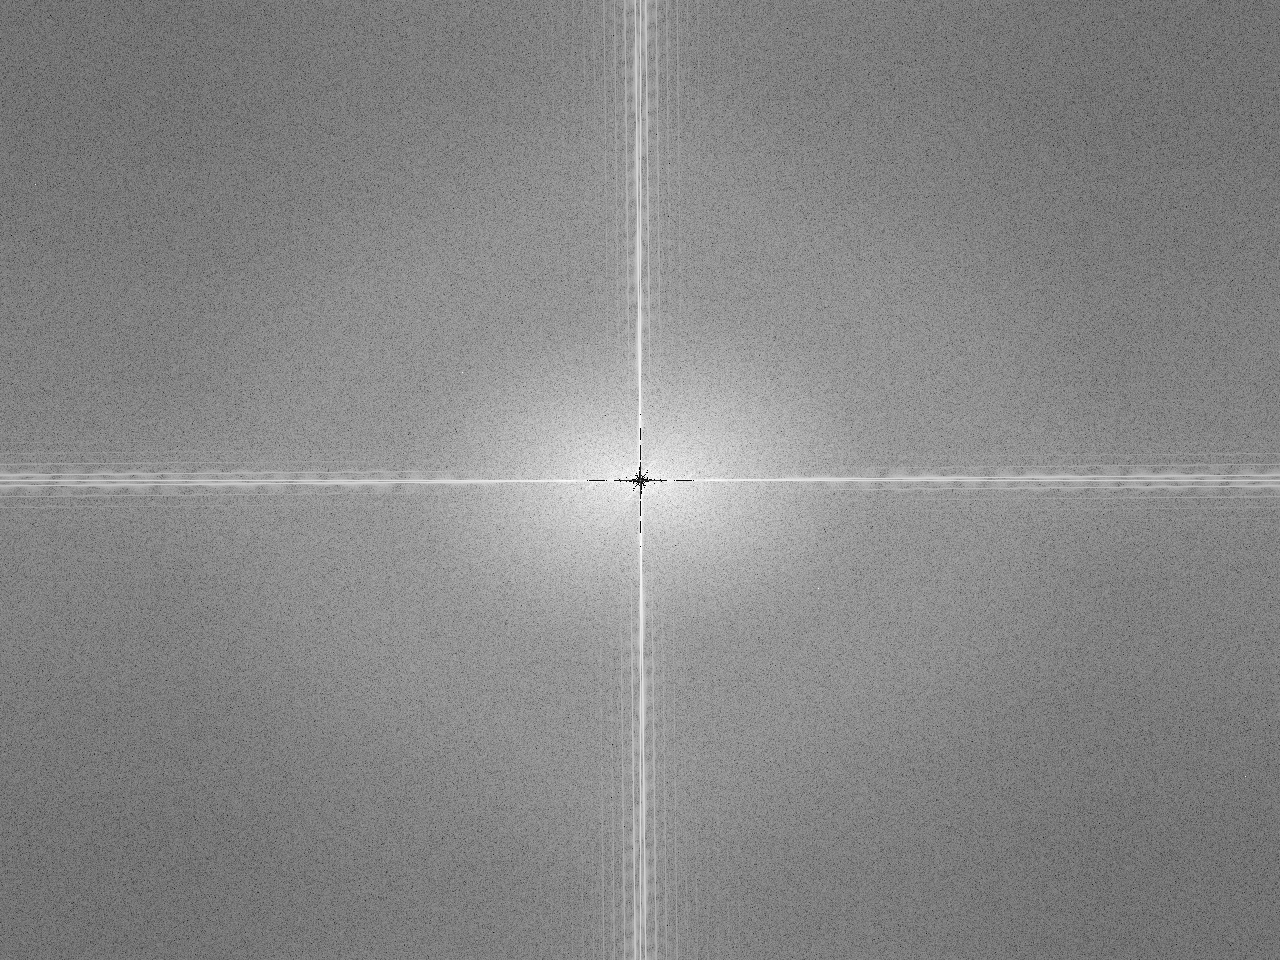

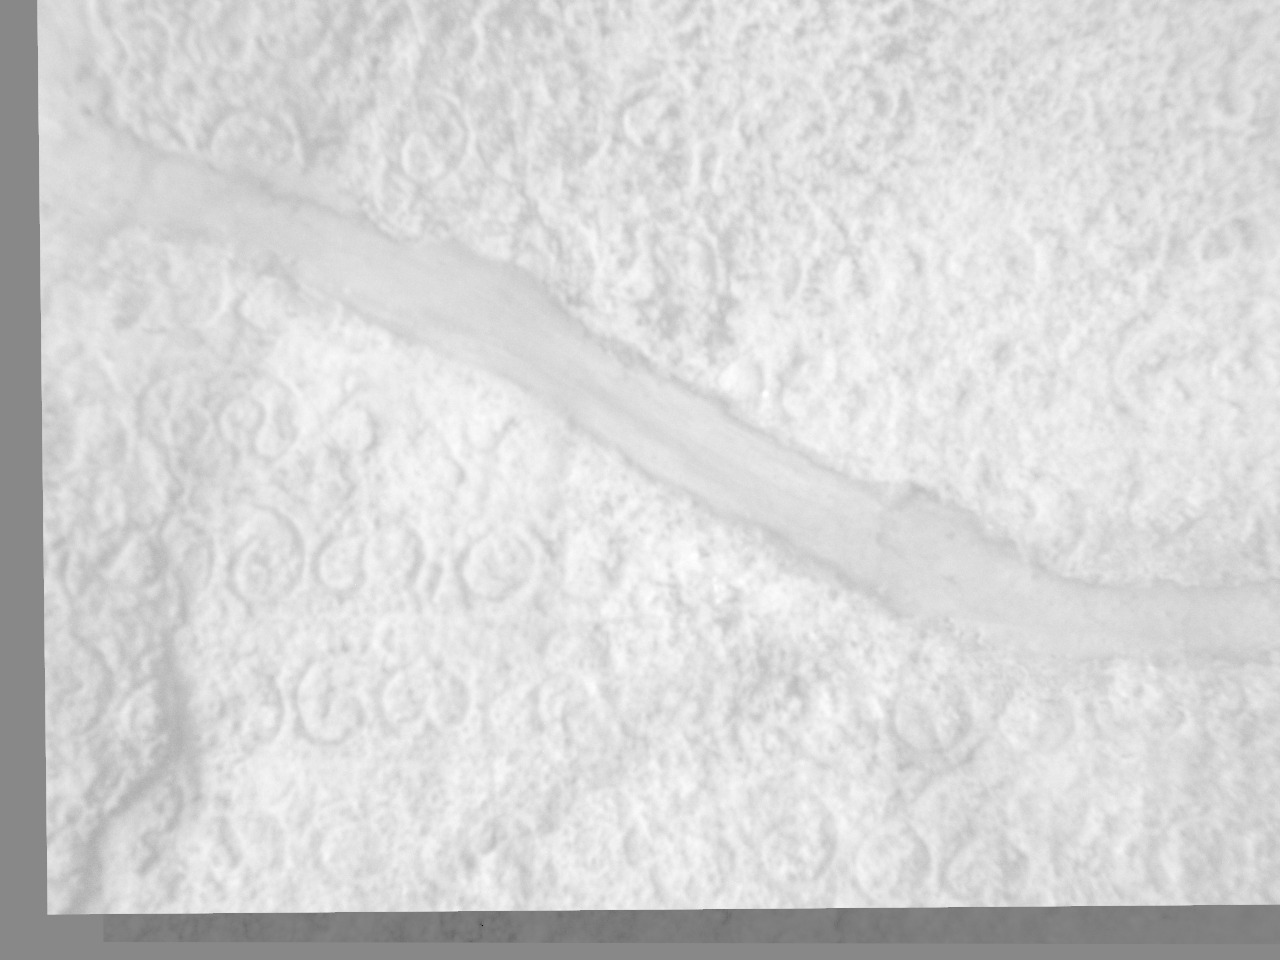

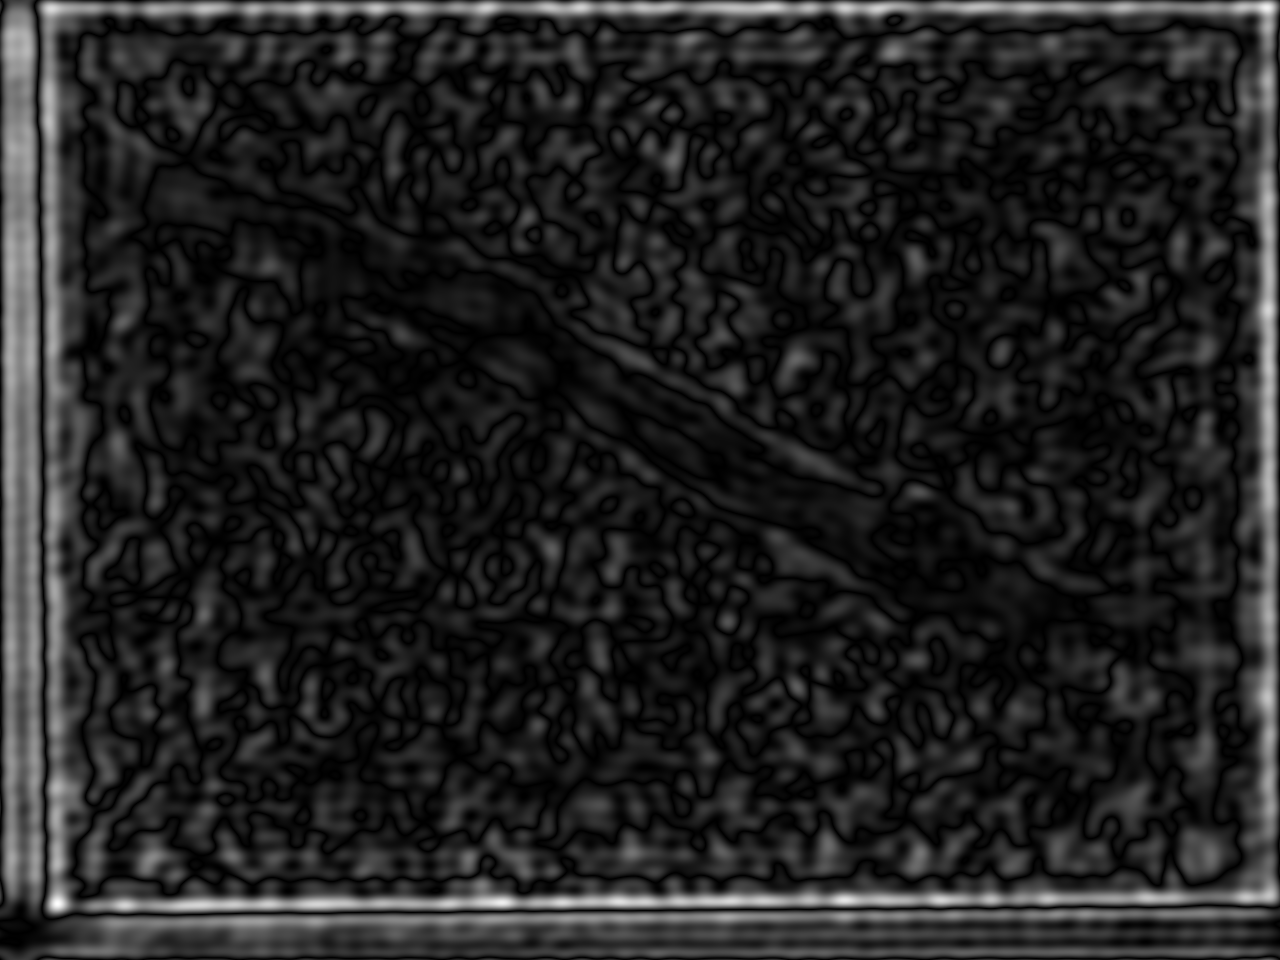

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Check if the files exist before trying to access them
imageName_list_1 = glob.glob(os.path.join(imagePath, 'Intensity-1.jpg'))

if imageName_list_1:  # Check if images exist
    image_intensity1 = imageName_list_1[0]

    # Load the image without additional processing (already in grayscale)
    image = cv2.imread(image_intensity1, cv2.IMREAD_GRAYSCALE)

    # Verify if the image is loaded correctly
    if image is None:
        print("Error loading the image. Check the file format or path.")
    else:
        # Apply Fourier Transform
        f = np.fft.fft2(image)
        fshift = np.fft.fftshift(f)

        # Magnitude Spectrum (for visualization)
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        # Display the magnitude spectrum
        cv2_imshow(np.uint8(magnitude_spectrum))

        # Create a mask for filtering (Band-pass filter)
        rows, cols = image.shape
        crow, ccol = rows // 2, cols // 2

        # Band-pass filter mask
        mask = np.zeros((rows, cols), np.uint8)
        r_out = 50  # Outer radius (low frequencies)
        r_in = 10   # Inner radius (high frequencies)
        x, y = np.ogrid[:rows, :cols]
        mask_area = (x - crow) ** 2 + (y - ccol) ** 2
        mask[(mask_area <= r_out ** 2) & (mask_area >= r_in ** 2)] = 1

        # Apply mask and inverse DFT
        fshift = fshift * mask

        # Inverse FFT to get the filtered image
        f_ishift = np.fft.ifftshift(fshift)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back)

        # Normalize to uint8 for display
        img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

        # Display the original and filtered images
        cv2_imshow(image)      # Original Image
        cv2_imshow(img_back)   # Filtered Image (with improved clarity)
else:
    print("No images found in the specified path!")

**ACC - Intensity 2**

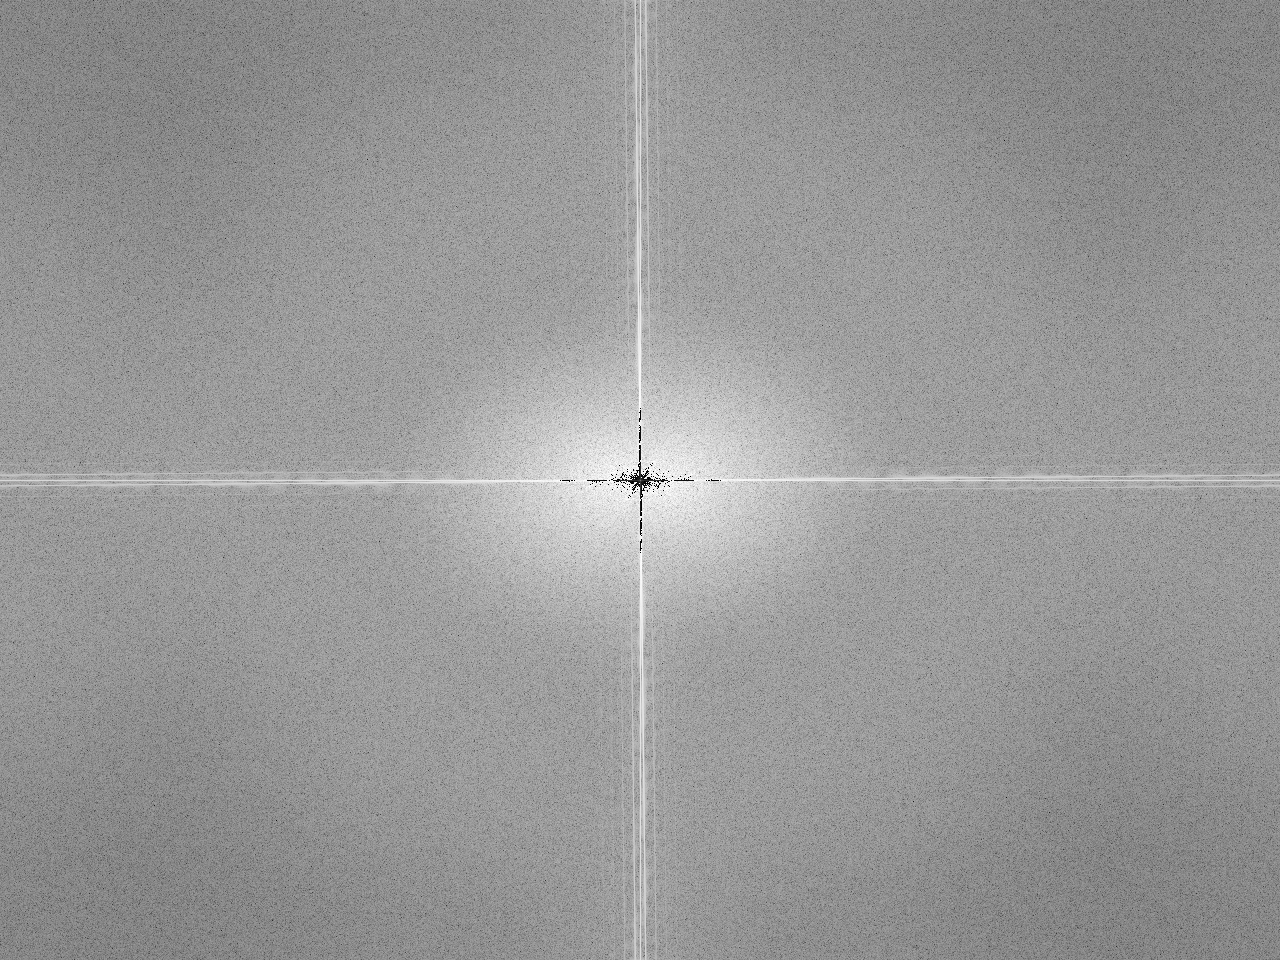

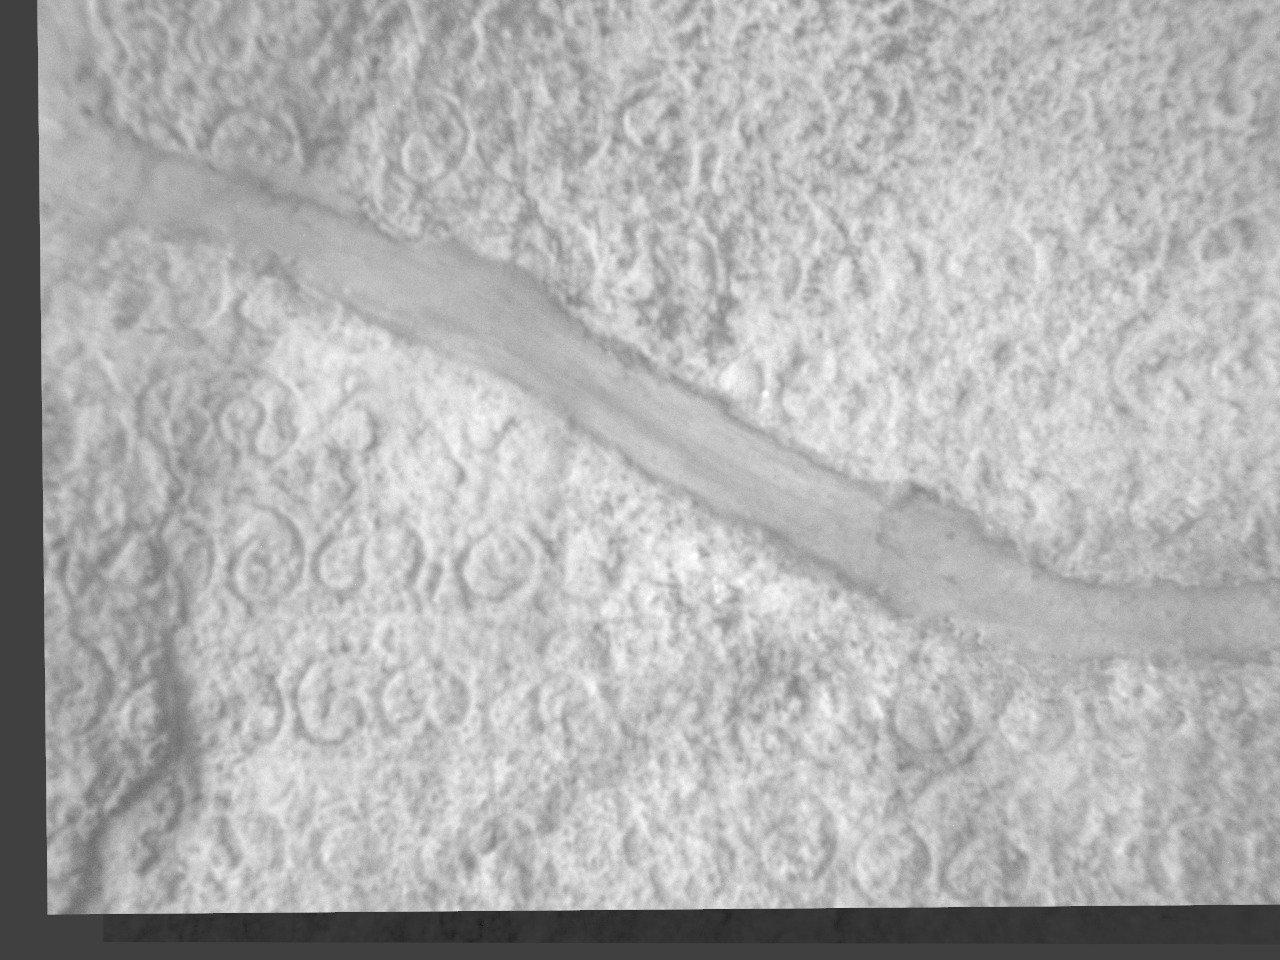

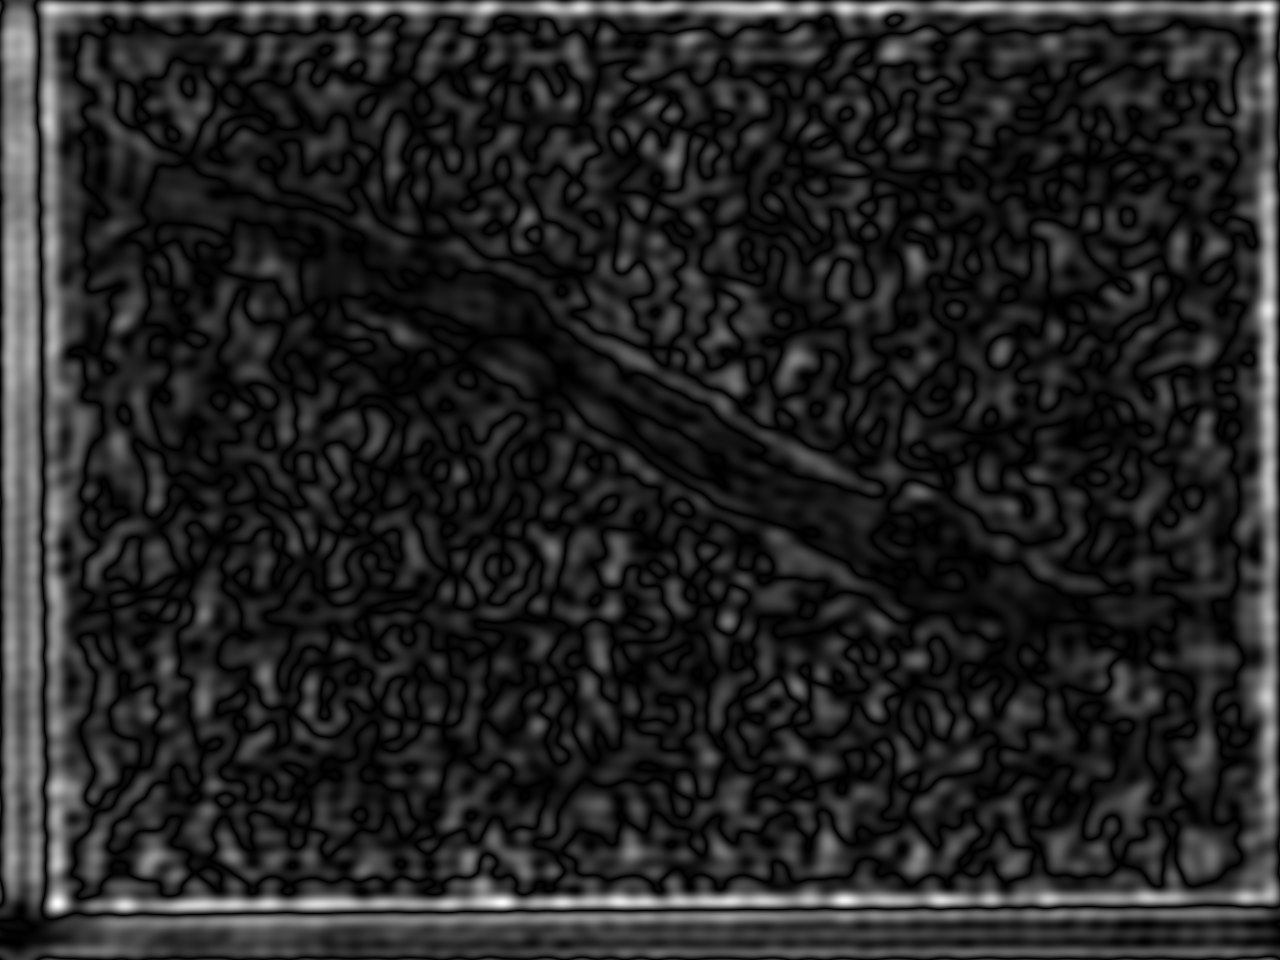

In [8]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Check if the files exist before trying to access them
imageName_list_2 = glob.glob(os.path.join(imagePath, 'Intensity-2.jpg'))

if imageName_list_2:  # Check if images exist
    image_intensity2 = imageName_list_2[0]

    # Load the image without additional processing (already in grayscale)
    image = cv2.imread(image_intensity2, cv2.IMREAD_GRAYSCALE)

    # Verify if the image is loaded correctly
    if image is None:
        print("Error loading the image. Check the file format or path.")
    else:
        # Apply Fourier Transform
        f = np.fft.fft2(image)
        fshift = np.fft.fftshift(f)

        # Magnitude Spectrum (for visualization)
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        # Display the magnitude spectrum
        cv2_imshow(np.uint8(magnitude_spectrum))

        # Create a mask for filtering (Band-pass filter)
        rows, cols = image.shape
        crow, ccol = rows // 2, cols // 2

        # Band-pass filter mask
        mask = np.zeros((rows, cols), np.uint8)
        r_out = 50  # Outer radius (low frequencies)
        r_in = 10   # Inner radius (high frequencies)
        x, y = np.ogrid[:rows, :cols]
        mask_area = (x - crow) ** 2 + (y - ccol) ** 2
        mask[(mask_area <= r_out ** 2) & (mask_area >= r_in ** 2)] = 1

        # Apply mask and inverse DFT
        fshift = fshift * mask

        # Inverse FFT to get the filtered image
        f_ishift = np.fft.ifftshift(fshift)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back)

        # Normalize to uint8 for display
        img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

        # Display the original and filtered images
        cv2_imshow(image)      # Original Image
        cv2_imshow(img_back)   # Filtered Image (with improved clarity)
else:
    print("No images found in the specified path!")

**ACC - Intensity 3**

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Image path
imagePath = r"/content/drive/My Drive/UCSC/5. 4th Year/Research - Epigraphs/Data/Processed Images/"

# Check if the files exist before trying to access them
imageName_list_3 = glob.glob(os.path.join(imagePath, 'Intensity-3.jpg'))

if imageName_list:  # Check if images exist
    image_intensity3 = imageName_list_3[0]

    # Load the image without additional processing (already in grayscale)
    image = cv2.imread(image_intensity3, cv2.IMREAD_GRAYSCALE)

    # Verify if the image is loaded correctly
    if image is None:
        print("Error loading the image. Check the file format or path.")
    else:
        # Apply Fourier Transform
        f = np.fft.fft2(image)
        fshift = np.fft.fftshift(f)

        # Magnitude Spectrum (for visualization)
        magnitude_spectrum = 20 * np.log(np.abs(fshift))

        # Display the magnitude spectrum
        cv2_imshow(np.uint8(magnitude_spectrum))

        # Create a mask for filtering (Band-pass filter)
        rows, cols = image.shape
        crow, ccol = rows // 2, cols // 2

        # Band-pass filter mask
        mask = np.zeros((rows, cols), np.uint8)
        r_out = 50  # Outer radius (low frequencies)
        r_in = 10   # Inner radius (high frequencies)
        x, y = np.ogrid[:rows, :cols]
        mask_area = (x - crow) ** 2 + (y - ccol) ** 2
        mask[(mask_area <= r_out ** 2) & (mask_area >= r_in ** 2)] = 1

        # Apply mask and inverse DFT
        fshift = fshift * mask

        # Inverse FFT to get the filtered image
        f_ishift = np.fft.ifftshift(fshift)
        img_back = np.fft.ifft2(f_ishift)
        img_back = np.abs(img_back)

        # Normalize to uint8 for display
        img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

        # Display the original and filtered images
        cv2_imshow(image)      # Original Image
        cv2_imshow(img_back)   # Filtered Image (with improved clarity)
else:
    print("No images found in the specified path!")

NameError: name 'imageName_list' is not defined

Low Pass

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread(imageName_blue, cv2.IMREAD_GRAYSCALE)

# Apply Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# Create a low-pass filter mask
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2
r = 50  # Radius of the low-pass filter

# Create a circular mask, centered at the frequency domain center
mask = np.zeros((rows, cols), np.uint8)
x, y = np.ogrid[:rows, :cols]
mask_area = (x - crow) ** 2 + (y - ccol) ** 2 <= r*r
mask[mask_area] = 1

# Apply the mask and inverse DFT
fshift = fshift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Normalize to uint8
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# Display the original and filtered images
cv2_imshow(image)      # Original Image
cv2_imshow(img_back)   # Low-Pass Filtered Image


High pass

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread(imageName_blue, cv2.IMREAD_GRAYSCALE)

# Apply Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# Create a high-pass filter mask
rows, cols = image.shape
crow, ccol = rows // 2 , cols // 2
r = 50  # Radius of the high-pass filter

# Create a circular mask, inverted to keep high frequencies
mask = np.ones((rows, cols), np.uint8)
x, y = np.ogrid[:rows, :cols]
mask_area = (x - crow) ** 2 + (y - ccol) ** 2 <= r*r
mask[mask_area] = 0

# Apply the mask and inverse DFT
fshift = fshift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Normalize to uint8
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# Display the original and filtered images
cv2_imshow(image)      # Original Image
cv2_imshow(img_back)   # High-Pass Filtered Image


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread(imageName_green, cv2.IMREAD_GRAYSCALE)

# Apply Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# Magnitude Spectrum (for visualization)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Display the magnitude spectrum
cv2_imshow(np.uint8(magnitude_spectrum))

# Create a mask for filtering (Band-pass filter)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Band-pass filter mask
mask = np.zeros((rows, cols), np.uint8)
r_out = 50  # Outer radius (low frequencies)
r_in = 10   # Inner radius (high frequencies)
x, y = np.ogrid[:rows, :cols]
mask_area = (x - crow) ** 2 + (y - ccol) ** 2
mask[(mask_area <= r_out ** 2) & (mask_area >= r_in ** 2)] = 1

# Apply mask and inverse DFT
fshift = fshift * mask

# Inverse FFT to get the filtered image
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Normalize to uint8 for display
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# Display the original and filtered images
cv2_imshow(image)      # Original Image
cv2_imshow(img_back)   # Filtered Image (with improved clarity)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread(imageName_red, cv2.IMREAD_GRAYSCALE)

# Apply Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# Magnitude Spectrum (for visualization)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Display the magnitude spectrum
cv2_imshow(np.uint8(magnitude_spectrum))

# Create a mask for filtering (Band-pass filter)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Band-pass filter mask
mask = np.zeros((rows, cols), np.uint8)
r_out = 50  # Outer radius (low frequencies)
r_in = 10   # Inner radius (high frequencies)
x, y = np.ogrid[:rows, :cols]
mask_area = (x - crow) ** 2 + (y - ccol) ** 2
mask[(mask_area <= r_out ** 2) & (mask_area >= r_in ** 2)] = 1

# Apply mask and inverse DFT
fshift = fshift * mask

# Inverse FFT to get the filtered image
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Normalize to uint8 for display
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# Display the original and filtered images
cv2_imshow(image)      # Original Image
cv2_imshow(img_back)   # Filtered Image (with improved clarity)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread(imageName_nir, cv2.IMREAD_GRAYSCALE)

# Apply Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# Magnitude Spectrum (for visualization)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Display the magnitude spectrum
cv2_imshow(np.uint8(magnitude_spectrum))

# Create a mask for filtering (Band-pass filter)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Band-pass filter mask
mask = np.zeros((rows, cols), np.uint8)
r_out = 50  # Outer radius (low frequencies)
r_in = 10   # Inner radius (high frequencies)
x, y = np.ogrid[:rows, :cols]
mask_area = (x - crow) ** 2 + (y - ccol) ** 2
mask[(mask_area <= r_out ** 2) & (mask_area >= r_in ** 2)] = 1

# Apply mask and inverse DFT
fshift = fshift * mask

# Inverse FFT to get the filtered image
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Normalize to uint8 for display
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# Display the original and filtered images
cv2_imshow(image)      # Original Image
cv2_imshow(img_back)   # Filtered Image (with improved clarity)


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread(imageName_rededge, cv2.IMREAD_GRAYSCALE)

# Apply Fourier Transform
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

# Magnitude Spectrum (for visualization)
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# Display the magnitude spectrum
cv2_imshow(np.uint8(magnitude_spectrum))

# Create a mask for filtering (Band-pass filter)
rows, cols = image.shape
crow, ccol = rows // 2, cols // 2

# Band-pass filter mask
mask = np.zeros((rows, cols), np.uint8)
r_out = 50  # Outer radius (low frequencies)
r_in = 10   # Inner radius (high frequencies)
x, y = np.ogrid[:rows, :cols]
mask_area = (x - crow) ** 2 + (y - ccol) ** 2
mask[(mask_area <= r_out ** 2) & (mask_area >= r_in ** 2)] = 1

# Apply mask and inverse DFT
fshift = fshift * mask

# Inverse FFT to get the filtered image
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

# Normalize to uint8 for display
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

# Display the original and filtered images
cv2_imshow(image)      # Original Image
cv2_imshow(img_back)   # Filtered Image (with improved clarity)
